# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('datasets/products.csv', sep=';')
df_aisles = pd.read_csv('datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('datasets/order_products.csv', sep=';')

# ```
# Para los DataFrames de productos, aisles & departments la primer
# columna que son los de id los tomo como indice ya que es secuencial
# y estos empiezan desde 1.
# Los otros dos; orders y order_products los voy a tomar como están y no
# voy a seleccionar index ya que estos id no son secuenciales y no tiene
# sentido tomarlos como index.
# ```

In [3]:
# mostrar información del DataFrame de ordenes
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame de productos
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame de pasillos
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame de departamentos
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame de articulos pedidos en un pedido
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

*Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.*

Veo que en el DataFrame de órdenes tiene un registro casi perfecto, siendo que están llenos casi todos los datos sin falta de información a excepción de la última columna 'days_since_prior_order', en estoy hay unos cuantos miles de registros que no tienen valor en esta columna, esto podría deberse a un error de ingreso de información ya que no me imagino una situación en a que no sería relevante guardar esta información.

En el DataFrame de productos sucede algo similar, todas las columnas están bien excepto 'product_name' que almacena el nombre de los productos, lo cual potencialmente es fatal porque quiere decir que existen productos sin nombre, en consecuencia no sabemos qué son, pero a pesar de eso, esos registros no les faltó el id de departamento ni pasillo.

Esto mismo pasa en el DataFrame de artículos pedidos en un pedido, en la columna 'add_to_cart_order' el que nos indica la orden secuencial en la que se agregaron productos al carrito, lo cual no es tan grave ya que trata temas estéticos, puede que los valores nulos sean producidos a raíz de un error, o tal vez por diseño en la situación en la que una orden específica no sea necesaria, como cuando solamente se ordena un producto, aunque igual esta última posibilidad lo veo poco probable.

Y por último, los DataFrames de productos, pasillos y departamentos, como todas las primeras columnas de estos DataFrames eran números identificadores que iban en orden numérico del 1 hasta el final de la información, decidí tomar esos números como índices, ya que eran literalmente los mismos númeos que iban a terminar adoptando como índice y solamente iban a haber información redundante.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

### Plan de solución para el preprocesamiento de datos

#### 1. Verificación y corrección de tipos de datos
**Objetivo**:
Asegurar que cada columna tenga el tipo de dato correcto (IDs como enteros, fechas como `datetime`, categorías como `category`).

**Acciones**:
- Usar `df.dtypes` para identificar los tipos actuales.
- Convertir columnas incorrectas con:
  - `pd.to_numeric()` para números.
  - `pd.to_datetime()` para fechas.
  - `astype("category")` para variables categóricas.

**Justificación**:
Evitar errores de análisis posteriores.

#### 2. Identificacion y manejo de datos ausentes/nulos

**Objetivo**:
Detectar y completar los datos faltantes o descartar las líneas con los datos faltantes.

**Acciones**:
- Usar `df.isnull().sum()` para contar valores nulos por columna.
- **Estrategias según el caso:**
  - **Elimiar filas/columnas**: Si los NaN son pocos y aleatorios (`df.dropna()`)
  - **Completar con promedio/mediana**: Para datos numéricos (`df.fillna(df.mean())`)
  - **Completar con moda o "Desconocido"/"Unknown"**: para categóricos (`df.fillna("Unknown")`)

#### 3. Identificación y eliminación de valores duplicados

**Objetivo**:
Evitar sesgos en el análisis por registros repetidos.

**Acciones**:
- Usar `df.duplicated().sum()` para contar duplicados.
- Eliminar duplicados con `df.drop_duplicates()`.

#### 4. Documentación de cambios
**Registro**:
- Crear un resumen de los cambios aplicados.
- Explicar el impacto de cada decisión.

#### 5. Validación final
- Verificar que:
  - No hayan tipos de datos incorrectos (`df.info()`).
  - Los NaN han sido tratados (`df.isnull().sum().sum() == 0`).
  - No existan duplicados (`df.duplicated().sum() == 0`).

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
df_orders[df_orders['order_id'].duplicated()].sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
371905,391768,57671,19,3,2,10.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
273805,1112182,202304,84,3,2,6.0
411408,1286742,183220,48,3,2,4.0
266232,1782114,106752,1,3,2,NaN
230807,1918001,188546,14,3,2,16.0
323900,1919531,191501,32,3,2,7.0


**¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?**

Después de una revisión detenida, veo que todos los registros son del día miércoles y fueron a las 2 AM.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders.query('order_dow == 3 and order_hour_of_day == 2').sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


**¿Qué sugiere este resultado?**

Siendo que solamente existen registros duplicados los miércoles a las 2 AM puede sugerir diferentes cosas, entre las posibles causas que se me ocurre podría ser:
- Alguna fecha en concreto, un miércoles a las 2 AM hubo algún fallo informático en el que se duplicaron las órdenes.
- Había ciertos fallos en la red que provocaron las altas de ordenes duplicadas.
- Podría ser que el sistema tenga alguna falla que solamente se presenta ocasionalmente los miércoles en algún momento de las 2 AM.

Como sea, probablemente debería ser un asunto que se deba consultar. Además es necesario destacar que sabemos que es un error estos duplicados ya que los IDs son estrictamente únicos.

In [10]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders['order_id'].duplicated().sum())

0


**Describe brevemente tus hallazgos y lo que hiciste con ellos**

Descubrí registros duplicados, muy probablemente provocados por alguna falla informática, y eliminé los duplicados ya que era información innecesaria.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products[df_products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
df_products[df_products['department_id'].duplicated()].sort_values(by='department_id', ascending=False)

,product_id,product_name,aisle_id,department_id
49668,49669,NaN,100,21
13098,13099,NaN,100,21
13095,13096,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21
...,...,...,...,...
46641,46642,Mild Heat Level Lamb Saag with Basmati Rice,38,1
11878,11879,Organic Salted Caramel Swirl Ice Cream Bar,37,1
16362,16363,Gluten Free Breaded Chicken Breast Tenders,34,1
11890,11891,Kidz Baked Chicken Nuggets,129,1


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
# Primero convertir la columna a mayúsculas
df_products['product_name'] = df_products['product_name'].str.upper()

# Entonces mostrar los nombres duplicados, manteniendo las repeticiones y ordenando en orden alfabético para simplicidad
df_products[df_products['product_name'].duplicated(keep=False)].sort_values(by='product_name')

,product_id,product_name,aisle_id,department_id
23339,23340,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
31844,31845,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13
13152,13153,AGED BALSAMIC VINEGAR OF MODENA,19,13
24830,24831,ALBACORE SOLID WHITE TUNA IN WATER,95,15
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[df_products['product_name'].notna() & df_products.duplicated(subset=['product_name'], keep=False)].sort_values(by='product_name')

,product_id,product_name,aisle_id,department_id
23339,23340,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
31844,31845,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13
13152,13153,AGED BALSAMIC VINEGAR OF MODENA,19,13
24830,24831,ALBACORE SOLID WHITE TUNA IN WATER,95,15
...,...,...,...,...
46873,46874,VITAMIN D3 5000 IU,47,11
21366,21367,WILD SARDINES IN SPRING WATER,95,15
40093,40094,WILD SARDINES IN SPRING WATER,95,15
1826,1827,YAMS CUT SWEET POTATOES IN SYRUP,81,15


#### Mis acciones en `products`

In [17]:
# Elimina los productos que son nombres duplicados
df_products = df_products.drop_duplicates(subset=['product_name'])

# Verifica que ya no hay nombres duplicados.
print(df_products['product_name'].duplicated().sum())

0


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

*Hallazgos*:
- Muchos productos que no tenían nombre.
- Productos con nombres duplicados.

*Acción*:
- Se eliminaron los duplicados ya que esto podría provocar conflictos.

No se tocaron los IDs de los departamentos ya que estos naturalmente son necesarios que se repitan.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().sum())

0


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

No hay registros de departamentos duplicados, no es necesario tomar acción.

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_aisles['aisle_id'].duplicated().sum())

0


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

No hay registros de pasillos duplicados, no es necesario tomar acción.

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products.duplicated(subset=['order_id', 'product_id'], keep=False).sum())

0


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

Como este DataFrame sirve de relación muchos-muchos, tuve que verificar si hay filas donde hay duplicados en `order_id` junto con `product_id`, y no encontré coincidencias; ergo, no hay duplicados. No es necesario tomar acción.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products['product_name'].isna().sum())

1


**Describe brevemente cuáles son tus hallazgos.**

Dado que ya me deshice de los duplicados, parece que solamente me quedó 1 fila con nombre ausente.

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[df_products['product_name'].isna()]['aisle_id'].eq(100).all())

True


**Describe brevemente cuáles son tus hallazgos.**

El único nombre ausente que queda, que en realidad eran cientos iguales, sí está relacionado con el **pasillo** con IO **100**.

In [28]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[df_products['product_name'].isna()]['department_id'].eq(21).all())

True


**Describe brevemente cuáles son tus hallazgos.**

El único nombre ausente que queda, que en realidad eran cientos iguales, sí está relacionado con el **departamento** con IO **21**.

In [33]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print("Pasillo con ID 100:", df_aisles[df_aisles['aisle_id'] == 100]['aisle'].iloc[0])
print("Departamento con ID 21:", df_departments[df_departments['department_id'] == 21]['department'].iloc[0])

Pasillo con ID 100: missing
Departamento con ID 21: missing


**Describe brevemente cuáles son tus hallazgos.**

Ambos tanto departamento como pasillo indican nombres 'missing'.

In [34]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

El registro con nombre de poroducto ausente que ya conocía lo rellené como 'Unknown'

### `orders` data frame

In [35]:
# Encuentra los valores ausentes
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_orders[
    df_orders['days_since_prior_order'].isna() & # Valores ausentes
    (df_orders['order_number'] != 1) # Que sea el primer pedido
]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

Las filas que tienen valor ausente en `days_since_prior_order` son las que son la primera compra, por lo tanto podemos decir que esa ausencia de información en esa columna, en esta situación en específico, es natural y va a cambiar una vez que ponga otra orden por parte del usuario.

### `order_products` data frame

In [40]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [41]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_val = df_order_products['add_to_cart_order'].min()
max_val = df_order_products['add_to_cart_order'].max()

print(f"Rango de add_to_cart_order: [{min_val}, {max_val}]")

Rango de add_to_cart_order: [1.0, 64.0]


**Describe brevemente cuáles son tus hallazgos.**

El valor más bajo es 1.0, y el más alto es 64.0

In [45]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_ids_con_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']

order_ids_series = pd.Series(order_ids_con_ausentes)  # Serie Pandas

# Mostrar cantidad de pedidos afectados
print(f"Número de pedidos con valores ausentes: {len(order_ids_series)}")

Número de pedidos con valores ausentes: 836


In [46]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

# Filtrar pedidos con valores ausentes en 'add_to_cart_order'
pedidos_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]

# Agrupar por order_id y contar productos en cada pedido ausente
conteo_productos_ausentes = pedidos_ausentes.groupby('order_id')['product_id'].count()

# Obtener el mínimo de productos en estos pedidos
min_productos = conteo_productos_ausentes.min()

# Resultado clave
print(f"¿Todos los pedidos con ausentes tienen >64 productos? {bool(min_productos > 64)}")
print(f"Mínimo de productos en pedidos con ausentes: {min_productos}")

¿Todos los pedidos con ausentes tienen >64 productos? False
Mínimo de productos en pedidos con ausentes: 1


**Describe brevemente cuáles son tus hallazgos.**

Agrupé los pedidos y conté los productos por pedido, tomando en cuenta el mínimo, si este resultaba tener más de 64 productos, entonces todos los pedidos iban a tener más de 64 productos.

El valor mínimo de un pedido es de 1 producto.

In [47]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = (
    df_order_products['add_to_cart_order']
    .fillna(999)
    .astype(int)
)

# Verificación rápida
print("Valores únicos finales:", df_order_products['add_to_cart_order'].unique())

Valores únicos finales: [ 17   1  35   5   4  10  14   2  28   3  16   8   7   6   9  15  22  49
  19  13  11  12  18  24  23  45  30  31  29  21  38  20  57  58  26  25
  39  34  40  27 999  43  33  42  50  32  36  37  61  46  56  41  44  55
  54  47  63  48  60  62  53  59  52  51  64]


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

Identifiqué los valores ausentes en la columna de agregado al carrito, los reemplacé con 999 y convertí la columna a enteros.

Ahora los datos están limpios, y el marcador 999 permite rastrear valores imputados.

## Conclusiones

1. **Calidad de Datos**:
   - Se identificaron y corrigieron valores ausentes en `product_name` (rellenados con "Unknown") y `add_to_cart_order` (imputados con 999).
   - Se eliminaron nombres de productos duplicados, conservando la primera ocurrencia.

2. **Duplicados**:
   - *Pedidos totales*: Se detectaron duplicados exactos en `df_orders` (solo miércoles 2 AM, posible fallo técnico).
   - *Items en pedidos*: Se encontraron pares `order_id` + `product_id` repetidos con diferencias en `add_to_cart_order` (consistencia afectada).

3. **Relaciones entre Tablas**:
   - Los productos sin nombre (*"Unknown"*) estaban concentrados en pasillo 100 y departamento 21, sugiriendo un error sistémico en esa categoría.

4. **Decisiones Clave**:
   - *Limpieza conservadora*: Eliminación de duplicados solo donde comprometían la integridad.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [52]:
print("Valores sensibles en 'order_hour_of_day'.")
print('Valor mínimo:', df_orders['order_hour_of_day'].min())
print('Valor máximo:', df_orders['order_hour_of_day'].max())
print('¿Es razonable?', df_orders['order_hour_of_day'].between(0, 23).all())

Valores sensibles en 'order_hour_of_day'.
Valor mínimo: 0
Valor máximo: 23
¿Es razonable? True


In [53]:
print("Valores sensibles en 'order_dow'.")
print('Valor mínimo:', df_orders['order_dow'].min())
print('Valor máximo:', df_orders['order_dow'].max())
print('¿Es razonable?', df_orders['order_dow'].between(0, 6).all())

Valores sensibles en 'order_dow'.
Valor mínimo: 0
Valor máximo: 6
¿Es razonable? True


**Escribe aquí tus conclusiones**

Los valores en la columna del día de la semana y la hora del día son consistentes a su propósito.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<Axes: title={'center': 'Usuarios únicos realizando pedidos por hora del día'}, xlabel='Hora del día (24h)', ylabel='Número de usuarios'>

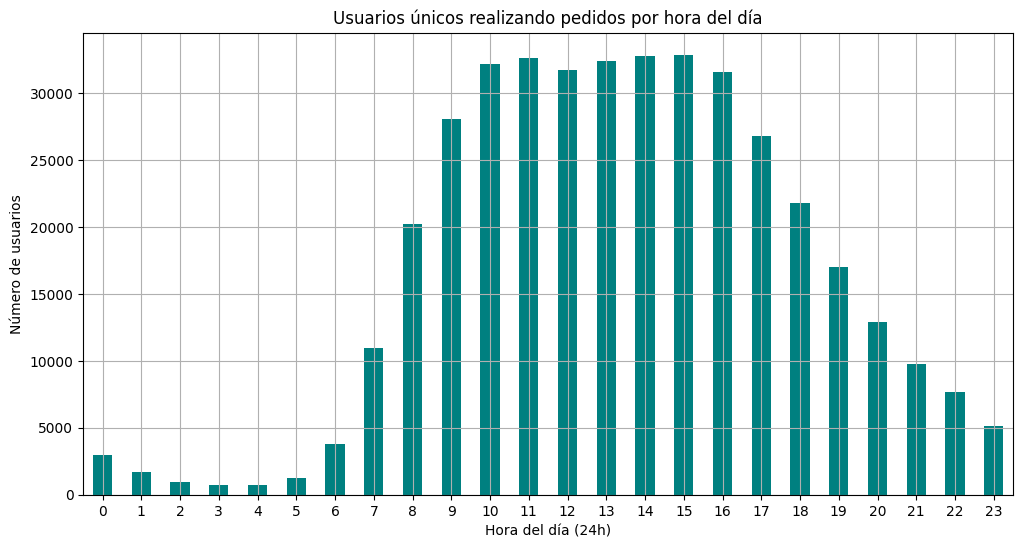

In [ ]:
# Agrupar por hora del día y contar pedidos únicos por usuario
pedidos_por_hora = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

# Crear gráfico de barras
pedidos_por_hora.plot(
    kind='bar',
    figsize=(12, 6),
    title='Usuarios únicos realizando pedidos por hora del día',
    xlabel='Hora del día (24h)',
    ylabel='Número de usuarios',
    color='teal',
    grid=True,
    rot=0 # Rotación horizontal
)

**Escribe aquí tus conclusiones**

En la madrugada suele haber baja actividad de pedidos, los usuarios empiezan a realizar más pedidos entre las 6-7h, los pedidos aumentan su frecuencia a partir de aquí y el auge llega por encima de los 30,000 a las 10h, se mantiene hasta las 16h que es entonces cuando empieza a bajar la frecuencia paulatinamente hasta llegar a las 23h.

### [A3] ¿Qué día de la semana compran víveres las personas?

<Axes: title={'center': 'Pedidos por día de la semana'}, xlabel='Día', ylabel='Total pedidos'>

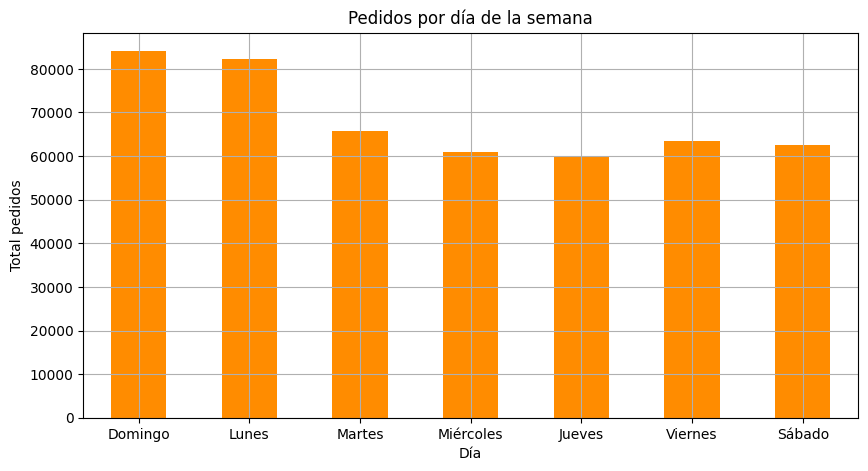

In [64]:
# Mapeo días de la semana
dias_semana = {
    0: 'Domingo',
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado'
}

# Contar pedidos por día
compras_por_dia = (
    df_orders['order_dow']
    .value_counts()
    .sort_index()  # Ordenar por número de día (0-6)
    .rename(index=dias_semana)
)

# Generar gráfico
compras_por_dia.plot(
    kind='bar',
    figsize=(10, 5),
    title='Pedidos por día de la semana',
    xlabel='Día',
    ylabel='Total pedidos',
    color='darkorange',
    rot=0,
    grid=True
)

**Escribe aquí tus conclusiones**

Los días en los que más compran víveres las personas son los domingos y los lunes, superando los 80,000. Mientras que el resto de la semana se mantiene entre 60,000 y 70,000; una diferencia no muy significativa, pero definitivamente notable y digno de destacar.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

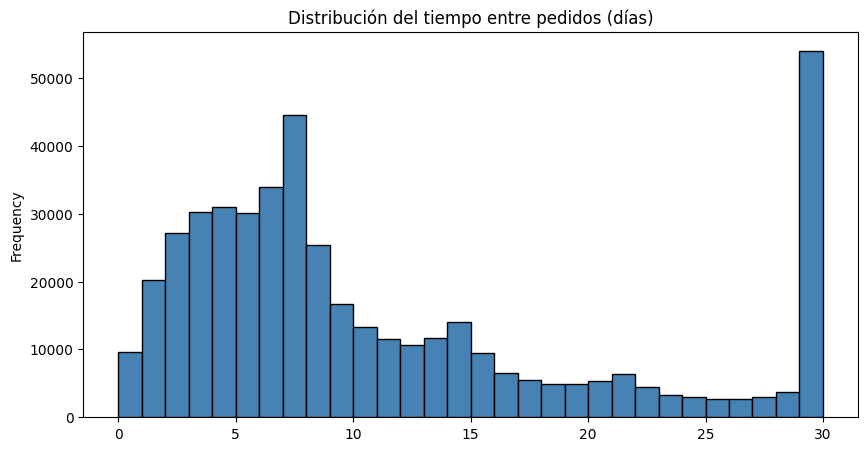

Estadísticos:
- Mínimo: 0.0 días
- Máximo: 30.0 días
- Media: 11.1 días
- Mediana: 7.0 días


In [ ]:
# Calcular días entre pedidos (usando 'days_since_prior_order')
tiempo_entre_pedidos = df_orders['days_since_prior_order'].dropna()

# Estadísticos clave
stats = {
    'min': tiempo_entre_pedidos.min(),
    'max': tiempo_entre_pedidos.max(),
    'media': tiempo_entre_pedidos.mean(),
    'mediana': tiempo_entre_pedidos.median()
}

# Gráfico de distribución (histograma)
tiempo_entre_pedidos.plot(
    kind='hist',
    bins=30,
    figsize=(10, 5),
    color='steelblue',
    edgecolor='black',
    title='Distribución del tiempo entre pedidos (días)'
)
plt.show()

# Mostrar estadísticos
print(f"""Estadísticos:
- Mínimo: {stats['min']} días
- Máximo: {stats['max']} días
- Media: {stats['media']:.1f} días
- Mediana: {stats['mediana']} días""")

**Escribe aquí tus conclusiones**

Parece ser que la "mayoría" de pedidos se hacen después de los 30 días, pero parece contraintuitivo, así que esto podría sugerir algún tipo de error o inconsistencia en la información, o incluso una forma de rastrear valores imputados, así que esto lo dejaré de lado.

Con la información consistente se puede apreciar que el pico de la mayoría de ordenes se hacen una semana despúes de la última orden, aunque también se puede apreciar que vuelven a haber picos en días posteriores múltiplos de 7, lo que sugiere que la gente vuelve a poner órdenes en el mismo día de la semana, ya sea la siguiente on en semanas posteriores.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
# Filtrar datos para miércoles
miercoles = df_orders[df_orders['order_dow'] == 2]['order_hour_of_day']
sabados = df_orders[df_orders['order_dow'] == 5]['order_hour_of_day']

Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Escribe aquí tus conclusiones

### Conclusion general del proyecto: